# Blurring, Edge, Sharpening

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

In [5]:
im = plt.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 7\bird.jpg')[:,:,:3]

In [6]:
imGray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

One way to increase the blurring of an image, is to increase the size of the mask. The other is to apply the mask over and over again.

In [7]:
smoothing_mask = np.ones((15,15))/225

- boundary: What do we do when we encounter and edge. In this case, we copy simmetrycally the pixels.
- mode: Mathematically, a convolution can output a different sized image, so we tell Scipy to keep the size

In [8]:
imBlurred = signal.convolve2d(imGray, smoothing_mask, boundary='symm', mode='same')

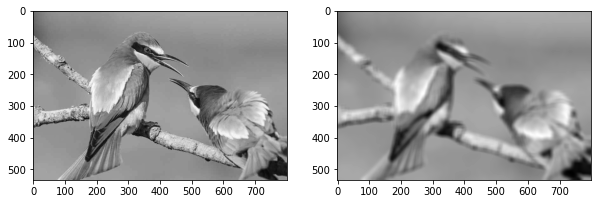

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imGray, cmap='gray')
ax2.imshow(imBlurred, cmap='gray')

In [10]:
xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
yMask = xMask.T.copy()

In [11]:
fx = signal.convolve2d(imGray, xMask, boundary='symm', mode='same')
fy = signal.convolve2d(imGray, yMask, boundary='symm', mode='same')

In [23]:
Gm = (fx**2 + fy**2)**0.5

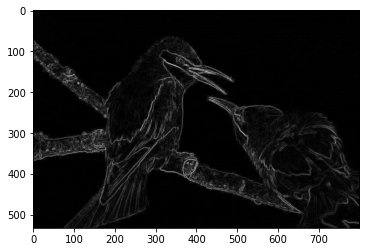

In [15]:
plt.imshow(Gm, cmap='gray')

In [18]:
th = Gm.max() - 4*Gm.std()
th

436.3206233276268

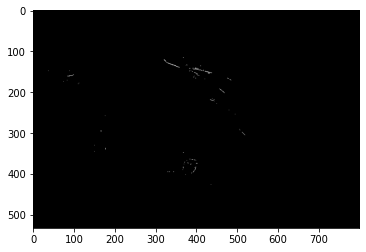

In [20]:
E = Gm > th
plt.imshow(E, cmap='gray')

In [27]:
imSharped = imBlurred + 0.5*Gm

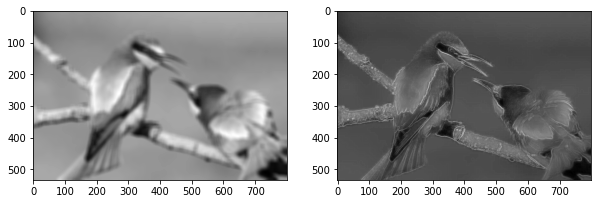

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imBlurred, cmap='gray')
ax2.imshow(imSharped, cmap='gray')